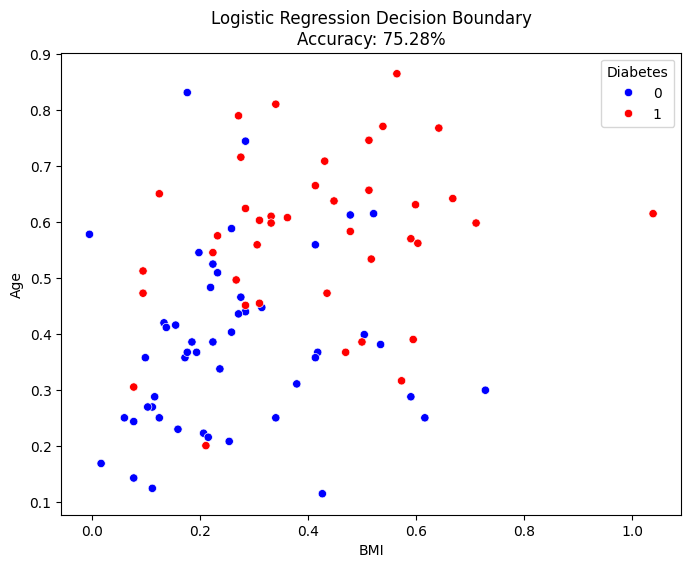

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target
y_binary = (y > np.median(y)).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, random_state=42)
scaler1 = StandardScaler()
x_train_scaled = scaler1.fit_transform(x_train)
x_test_scaled = scaler1.transform(x_test)
scaler2 = MinMaxScaler()
x_train_minmax = scaler2.fit_transform(x_train_scaled)
x_test_minmax = scaler2.transform(x_test_scaled)
model = LogisticRegression()
model.fit(x_train_minmax, y_train)
y_pred = model.predict(x_test_minmax)
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_test_minmax[:, 2], y=x_test_minmax[:, 8], hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()